In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import re
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import porter
import pymongo
from pymongo import MongoClient

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.decomposition import TruncatedSVD


from sklearn.decomposition import NMF

from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans



In [2]:
client = MongoClient()
db = client.jarvis
#collection = db.news1
#data = pd.DataFrame(list(collection.find()))

In [3]:
#text=doc['Cleanedcontent']
jarviscursor = db.cleanedcontent.find()[0:2]
for doc in jarviscursor:
    print(str(doc['Cleanedcontent']),'\n')

['washington', 'congression', 'republican', 'new', 'fear', 'health', 'lawsuit', 'obama', 'administr', 'might', 'win', 'incom', 'trump', 'administr', 'could', 'choos', 'longer', 'defend', 'execut', 'branch', 'suit', 'challeng', 'administr', 'author', 'spend', 'billion', 'dollar', 'health', 'insur', 'subsidi', 'american', 'hand', 'hous', 'republican', 'big', 'victori', 'issu', 'sudden', 'loss', 'disput', 'subsidi', 'could', 'conceiv', 'caus', 'health', 'program', 'implod', 'leav', 'million', 'peopl', 'without', 'access', 'health', 'insur', 'befor', 'republican', 'prepar', 'replac', 'could', 'lead', 'chao', 'insur', 'market', 'spur', 'polit', 'backlash', 'republican', 'gain', 'full', 'control', 'govern', 'stave', 'outcom', 'republican', 'could', 'find', 'themselv', 'awkward', 'posit', 'appropri', 'huge', 'sum', 'temporarili', 'prop', 'obama', 'health', 'law', 'anger', 'conserv', 'voter', 'demand', 'law', 'year', 'anoth', 'twist', 'donald', 'trump', 'administr', 'worri', 'preserv', 'execut

In [4]:
gen = (doc['Cleanedcontent'] for doc in db.cleanedcontent.find()[0:2])
for file in gen:
    print(file,'\n')

['washington', 'congression', 'republican', 'new', 'fear', 'health', 'lawsuit', 'obama', 'administr', 'might', 'win', 'incom', 'trump', 'administr', 'could', 'choos', 'longer', 'defend', 'execut', 'branch', 'suit', 'challeng', 'administr', 'author', 'spend', 'billion', 'dollar', 'health', 'insur', 'subsidi', 'american', 'hand', 'hous', 'republican', 'big', 'victori', 'issu', 'sudden', 'loss', 'disput', 'subsidi', 'could', 'conceiv', 'caus', 'health', 'program', 'implod', 'leav', 'million', 'peopl', 'without', 'access', 'health', 'insur', 'befor', 'republican', 'prepar', 'replac', 'could', 'lead', 'chao', 'insur', 'market', 'spur', 'polit', 'backlash', 'republican', 'gain', 'full', 'control', 'govern', 'stave', 'outcom', 'republican', 'could', 'find', 'themselv', 'awkward', 'posit', 'appropri', 'huge', 'sum', 'temporarili', 'prop', 'obama', 'health', 'law', 'anger', 'conserv', 'voter', 'demand', 'law', 'year', 'anoth', 'twist', 'donald', 'trump', 'administr', 'worri', 'preserv', 'execut

In [3]:
cv = CountVectorizer(lowercase=False, input='content', stop_words='english', max_df=0.4,min_df=0.1,  
                     token_pattern='[a-z]{3,}')
                     
gen = (doc['cleanedcontent1'] for doc in db.cleanedcontent1.find())
cv.fit(gen)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.4, max_features=None, min_df=0.1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='[a-z]{3,}', tokenizer=None,
        vocabulary=None)

In [13]:
cv.get_feature_names()

['abl',
 'accord',
 'account',
 'accus',
 'act',
 'action',
 'activ',
 'actual',
 'addit',
 'address',
 'administr',
 'agenc',
 'ago',
 'agre',
 'air',
 'allow',
 'alreadi',
 'alway',
 'america',
 'american',
 'announc',
 'answer',
 'anyon',
 'anyth',
 'appear',
 'area',
 'argu',
 'ask',
 'associ',
 'attack',
 'attempt',
 'author',
 'away',
 'bad',
 'base',
 'becam',
 'becom',
 'began',
 'begin',
 'believ',
 'best',
 'better',
 'big',
 'billion',
 'black',
 'book',
 'break',
 'bring',
 'build',
 'busi',
 'came',
 'campaign',
 'candid',
 'carri',
 'case',
 'caus',
 'center',
 'challeng',
 'chanc',
 'chang',
 'charg',
 'chief',
 'children',
 'citi',
 'claim',
 'clear',
 'clinton',
 'close',
 'cnn',
 'come',
 'comment',
 'commit',
 'committe',
 'commun',
 'compani',
 'complet',
 'concern',
 'confirm',
 'congress',
 'conserv',
 'consid',
 'continu',
 'control',
 'cost',
 'countri',
 'cours',
 'court',
 'cover',
 'creat',
 'critic',
 'current',
 'cut',
 'deal',
 'death',
 'debat',
 'decad',

In [11]:
cvwords = pd.Series(cv.get_feature_names())
cvwords.to_csv('cvngram_words.csv')

In [9]:
tf = TfidfVectorizer(lowercase=False, input='content', stop_words='english')
gen = (doc['cleanedcontent1'] for doc in db.cleanedcontent1.find())
tf.fit(gen)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [9]:
tf.get_feature_names()

['aaron',
 'abandon',
 'abc',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accur',
 'accus',
 'achiev',
 'acknowledg',
 'acquir',
 'acquisit',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'adequ',
 'adjust',
 'administr',
 'admir',
 'admiss',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'adversari',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advisori',
 'advoc',
 'advocaci',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'aftermath',
 'afternoon',
 'afterward',
 'age',
 'agenc',
 'agenda',
 'agent',
 'aggress',
 'ago',
 'agre',
 'agreement',
 'agricultur',
 'ahead',
 'aid',
 'aim',
 'air',
 'aircraft',
 'airlin',
 'airport',
 'airst

In [25]:
lda = LatentDirichletAllocation(n_components=30)

In [10]:
gen = (doc['cleaned_content1'] for doc in db.news1.find()[0:2])
for file in gen:
    print([file],'\n')

[['washington', 'congression', 'republican', 'new', 'fear', 'come', 'health', 'lawsuit', 'obama', 'administr', 'win', 'incom', 'trump', 'administr', 'choos', 'longer', 'defend', 'execut', 'branch', 'suit', 'challeng', 'administr', 'author', 'spend', 'billion', 'dollar', 'health', 'insur', 'subsidi', 'american', 'hand', 'hous', 'republican', 'big', 'victori', 'issu', 'sudden', 'loss', 'disput', 'subsidi', 'conceiv', 'caus', 'health', 'program', 'implod', 'leav', 'million', 'peopl', 'without', 'access', 'health', 'insur', 'republican', 'prepar', 'replac', 'lead', 'chao', 'insur', 'market', 'spur', 'polit', 'backlash', 'republican', 'gain', 'full', 'control', 'govern', 'stave', 'outcom', 'republican', 'find', 'awkward', 'posit', 'appropri', 'huge', 'sum', 'temporarili', 'prop', 'obama', 'health', 'law', 'anger', 'conserv', 'voter', 'demand', 'law', 'year', 'twist', 'donald', 'trump', 'administr', 'worri', 'preserv', 'execut', 'branch', 'prerog', 'choos', 'fight', 'republican', 'alli', 'ho

In [26]:

for epoch in range(10):
    gen = (doc['cleaned_content1'] for doc in db.news1.find({},no_cursor_timeout=True))
    for file in gen:
        vec_file = cv.transform([str(file)])
        lda.partial_fit(vec_file)


In [27]:

for epoch in range(10):
    gen = (doc['cleaned_content1'] for doc in db.news2.find({}, no_cursor_timeout=True))
    for file in gen:
        vec_file = cv.transform([str(file)])
        lda.partial_fit(vec_file)


In [28]:

for epoch in range(10):
    gen = (doc['cleaned_content1'] for doc in db.news3.find({},no_cursor_timeout=True))
    for file in gen:
        vec_file = cv.transform([str(file)])
        lda.partial_fit(vec_file)

In [43]:
#3823, 39869
#gen = (doc['cleaned_content1'] for doc in db.news1.find({},no_cursor_timeout=True))
for  doc in db.news1.find({},no_cursor_timeout=True)[39870:]:
    vec_file = cv.transform(doc['cleaned_content1'])
    try:
        lda_x = lda.transform(vec_file).tolist()
        db.news1.update_many({'_id': doc['_id']},{'$set':{'lda30_transform': lda_x }})
    except ValueError:
        pass
    
 #   lda_x = lda.transform(vec_file).tolist()
  #  db.news1.update_many({'_id': doc['_id']},{'$set':{'lda30_transform': lda_x }})

In [44]:
for  doc in db.news2.find({},no_cursor_timeout=True):
    vec_file = cv.transform(doc['cleaned_content1'])
    try:
        lda_x = lda.transform(vec_file).tolist()
        db.news2.update_many({'_id': doc['_id']},{'$set':{'lda30_transform': lda_x }})
    except ValueError:
        pass
    

In [45]:
for  doc in db.news3.find({},no_cursor_timeout=True):
    vec_file = cv.transform(doc['cleaned_content1'])
    try:
        lda_x = lda.transform(vec_file).tolist()
        db.news3.update_many({'_id': doc['_id']},{'$set':{'lda30_transform': lda_x }})
    except ValueError:
        pass
    
    

In [ ]:
for  doc in db.news3.find({},no_cursor_timeout=True):
    vec_file = cv.transform(doc['cleaned_content1'])
    lda_x = lda.transform(vec_file).tolist()
    db.news3.update_many({'_id': doc['_id']},{'$set':{'lda30_transform': lda_x }})

In [65]:
a = db.cleanedcontent1.aggregate( [ { '$sample': {'size' : 10}}])
#for doc in list(a):
 #   print(doc['Cleanedcontent'],'\n')

In [ ]:

for epoch in range(10):
    gen = [doc['cleanedcontent1'] for doc in list(a)]
    for file in gen:
        vec_file = tf.transform([file])
        lda.partial_fit(vec_file)


In [ ]:
SSEs = []
SSEs = []
for k in range(2,16):
    km = MiniBatchKMeans(n_clusters=k, random_state=2)
    km.fit(X)
    labels = km.labels_
    SSEs.append(km.inertia_) 
    
plt.figure(dpi=150)    
plt.xlabel("Number of clusters")  
plt.ylabel("SSE")
plt.plot(range(2,16), SSEs);

plt.savefig("sse_clusters")


In [90]:
kmeans=MiniBatchKMeans(n_clusters=39, random_state=np.random.RandomState(0), verbose=True)
for epoch in range(1):
    for doc in db.news1.find({},no_cursor_timeout=True):
        try:
            kmeans.partial_fit(doc['lda30_transform'] )
            
        except KeyError:
            continue
        

[MiniBatchKMeans] Reassigning 26 cluster centers.
[MiniBatchKMeans] Reassigning 16 cluster centers.
[MiniBatchKMeans] Reassigning 16 cluster centers.


In [91]:
kmeans=MiniBatchKMeans(n_clusters=39, random_state=np.random.RandomState(0), verbose=True)
for epoch in range(1):
    for doc in db.news2.find({},no_cursor_timeout=True):
        try:
            kmeans.partial_fit(doc['lda30_transform'] )
            
        except KeyError:
            continue



[MiniBatchKMeans] Reassigning 22 cluster centers.
[MiniBatchKMeans] Reassigning 7 cluster centers.
[MiniBatchKMeans] Reassigning 10 cluster centers.


In [92]:
kmeans=MiniBatchKMeans(n_clusters=39, random_state=np.random.RandomState(0), verbose=True)
for epoch in range(1):
    for doc in db.news3.find({},no_cursor_timeout=True):
        try:
            kmeans.partial_fit(doc['lda30_transform'] )
            
        except KeyError:
            continue



[MiniBatchKMeans] Reassigning 22 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
[MiniBatchKMeans] Reassigning 13 cluster centers.


In [ ]:
nclusters=[40,30,25,24, 23,22,26,27,  28,29,31,32, 33,34,35,36, 37,38,39]

print(kmeans.inertia_) 
SSEs.append(kmeans.inertia_) 

print(SSEs)


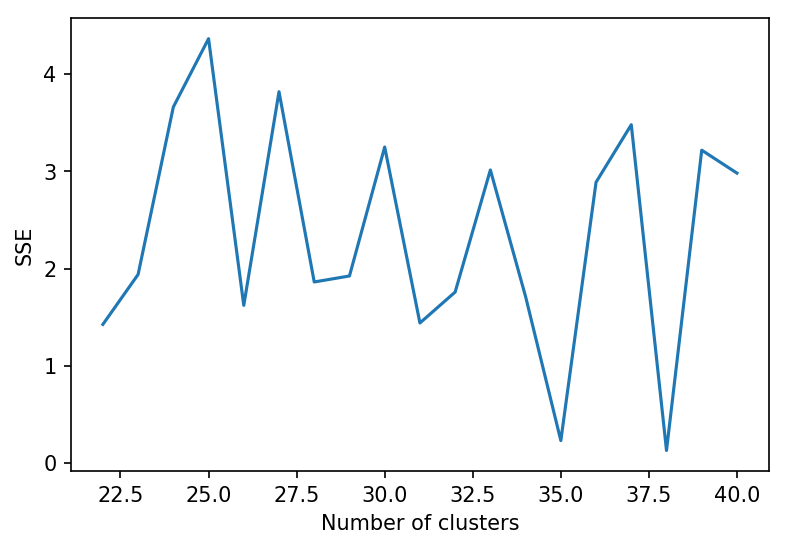

In [111]:
sse = [ 1.425412908627333,  1.9388190759047221, 3.659757672004038,  4.362406976876881,
        1.6209891445625795, 3.817157621399952, 1.8616206380927975, 1.9232542004552293, 3.2488791474382737,
       1.4399655322033822, 1.757948258085103, 3.0131169430134532, 1.7109985305377684, 0.23108543956295347, 
       2.8868295443627914, 3.4778941961709835, 0.12940106398326878, 3.2163633316198377,2.9803545576576034]


nclusters=[22,23,24, 25,26,27,  28,29,30,31, 32, 33,34,35,36, 37,38,39,40]
plt.figure(dpi=150)   

plt.xlabel("Number of clusters")  
plt.ylabel("SSE")
plt.plot(nclusters, sse)

plt.savefig("sse_clusters")

In [14]:
# for 1000 docs, 10 epochs
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [16]:
#for 100 docs
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda, cv.get_feature_names(), 10)


Topic  0
said, offici, russia, russian, secur, presid, compani, fbi, unit, foreign

Topic  1
trump, hi, republican, presid, campaign, democrat, elect, donald, obama, vote

Topic  2
post, facebook, twitter, photo, video, caption, new, stori, okay, restaur

Topic  3
percent, research, rate, year, peopl, use, say, like, make, increas

Topic  4
said, state, islam, wa, attack, militari, forc, countri, unit, syria

Topic  5
wa, hi, like, peopl, say, think, know, make, time, don

Topic  6
said, wa, polic, offic, kill, shoot, gun, told, peopl, accord

Topic  7
clinton, wa, said, hi, state, law, court, report, case, news

Topic  8
year, wa, new, american, world, time, washington, group, compani, nation

Topic  9
said, game, tax, million, year, plan, insur, money, billion, bank


In [9]:
# for 1000 docs, cv, ncomponents=30
display_topics(lda, cv.get_feature_names(), 20)


Topic  0
plan, increas, polici, air, free, econom, posit, chang, requir, provid, secretari, forc, potenti, read, immedi, base, cover, face, target, congress

Topic  1
world, power, agenc, real, global, role, sourc, big, intern, strong, develop, everyth, commit, perhap, latest, potenti, import, debat, actual, immedi

Topic  2
hillari, email, promis, address, messag, base, read, let, wrote, share, immedi, secretari, gave, perhap, fact, suggest, real, everyth, speech, receiv

Topic  3
post, media, twitter, privat, instead, taken, serv, describ, night, total, critic, immedi, washington, gave, face, read, social, discuss, speech, perhap

Topic  4
school, black, famili, children, white, live, home, hous, citi, commun, washington, young, public, local, life, help, high, social, place, friend

Topic  5
edit, target, led, write, chanc, latest, thursday, matter, meet, manag, expect, discuss, receiv, addit, global, control, best, head, strong, sourc

Topic  6
know, thing, way, look, realli, stor

In [15]:
# for 1000 docs, cv, ncomponents=35
display_topics(lda, cv.get_feature_names(), 20)


Topic  0
citi, washington, area, local, home, post, york, build, servic, hour, taken, place, week, plan, accord, busi, near, hous, small, start

Topic  1
investig, depart, inform, email, case, statement, charg, offic, accord, public, post, ask, comment, record, account, evid, servic, wrote, person, commun

Topic  2
way, know, thing, look, realli, right, stori, tri, someth, lot, happen, need, differ, talk, ask, mean, kind, feel, start, person

Topic  3
govern, unit, countri, forc, secur, militari, attack, offici, leader, fight, support, threat, action, protect, oper, week, washington, target, meet, sinc

Topic  4
candid, post, media, twitter, serv, instead, describ, taken, critic, morn, privat, appear, possibl, import, addit, news, statement, pass, discuss, everyth

Topic  5
histori, took, million, donald, live, free, friend, return, john, speech, stori, presidenti, alway, power, carri, word, note, declin, past, despit

Topic  6
wednesday, tuesday, immedi, statement, hear, argu, word, 

In [20]:
# for 1000 docs, cv, ncomponents=25
display_topics(lda, cv.get_feature_names(), 20)


Topic  0
attack, investig, statement, secur, inform, email, post, accord, ask, charg, public, offic, respons, comment, accus, account, person, interview, evid, week

Topic  1
trump, donald, republican, presidenti, elect, candid, polici, washington, polit, democrat, win, question, nation, american, voter, administr, critic, posit, view, comment

Topic  2
plan, order, foreign, wednesday, polici, thursday, monday, offici, leader, tuesday, week, news, step, action, face, director, countri, critic, threat, describ

Topic  3
post, black, washington, white, video, serv, race, play, record, week, earli, event, watch, second, look, later, left, right, hour, final

Topic  4
million, health, market, billion, fund, cost, money, program, pay, share, spend, manag, develop, big, futur, execut, provid, expect, total, requir

Topic  5
vote, democrat, parti, polit, elect, candid, leader, nation, econom, polici, messag, face, debat, foreign, week, need, challeng, critic, plan, order

Topic  6
nation, un

In [39]:
lsa = TruncatedSVD(2, algorithm = 'randomized')
a = db.cleanedcontent.aggregate( [ { '$sample': {'size' : 1000}}])

for epoch in range(1):
    gen = [doc['Cleanedcontent'] for doc in list(a)]
    for file in gen:
        vec_file = tf.transform([file])
        dtm_lsa = lsa.fit_transform(vec_file)
        dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)


# Fit LSA. Use algorithm = “randomized” for large datasets 
#lsa = TruncatedSVD(2, algorithm = 'arpack')

#dtm_lsa = lsa.fit_transform(dtm)
#dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)



/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/truncated_svd.py:192: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


In [40]:
display_topics(lsa, tf.get_feature_names(), 20)


Topic  0
music, jerri, spring, titl, charact, celebr, love, return, play, factor, fade, factori, fail, failur, fair, fairli, faction, facilit, fact, fake


In [38]:
nmf_model = NMF(2)

a = db.cleanedcontent.aggregate( [ { '$sample': {'size' : 1000}}])
for epoch in range(1):
    gen = [doc['Cleanedcontent'] for doc in list(a)]
    for file in gen:
        vec_file = tf.transform([file])
        dtm_nmf = nmf_model.fit_transform(vec_file)
        dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)






IndexError: index 1 is out of bounds for axis 1 with size 1

In [10]:
display_topics(lda, cv.get_feature_names(), 10)


Topic  0
year, wa, mani, think, women, world, american, time, peopl, new

Topic  1
republican, vote, state, democrat, voter, parti, elect, support, poll, campaign

Topic  2
trump, hi, said, presid, wa, donald, obama, white, elect, hillari

Topic  3
said, wa, court, law, case, state, depart, offic, school, justic

Topic  4
percent, compani, year, new, research, rate, market, said, use, data

Topic  5
hi, wa, game, play, team, year, night, star, season, best

Topic  6
clinton, campaign, post, report, senat, ani, group, wa, support, day

Topic  7
state, said, unit, russia, russian, govern, countri, north, offici, presid

Topic  8
wa, say, like, peopl, know, don, becaus, thing, famili, day

Topic  9
said, wa, polic, hi, state, kill, offic, attack, forc, islam


In [43]:
# for 1000 docs, tfidf
display_topics(lda, tf.get_feature_names(), 20)


Topic  0
zone, fact, fall, fake, faith, fairli, fair, failur, fail, fade, factori, factor, faction, facilit, express, facil, facebooksharetweet, facebook, fabric, eye

Topic  1
zone, fact, fall, fake, faith, fairli, fair, failur, fail, fade, factori, factor, faction, facilit, express, facil, facebooksharetweet, facebook, fabric, eye

Topic  2
zone, fact, fall, fake, faith, fairli, fair, failur, fail, fade, factori, factor, faction, facilit, express, facil, facebooksharetweet, facebook, fabric, eye

Topic  3
zone, fact, fall, fake, faith, fairli, fair, failur, fail, fade, factori, factor, faction, facilit, express, facil, facebooksharetweet, facebook, fabric, eye

Topic  4
zone, fact, fall, fake, faith, fairli, fair, failur, fail, fade, factori, factor, faction, facilit, express, facil, facebooksharetweet, facebook, fabric, eye

Topic  5
zone, fact, fall, fake, faith, fairli, fair, failur, fail, fade, factori, factor, faction, facilit, express, facil, facebooksharetweet, facebook, fabr